In [3]:
import pandas as pd
import numpy as np
#import h5py

data_P1=pd.read_hdf('zwei_populationen.h5', key='P_1')
data_P0=pd.read_hdf('zwei_populationen.h5', key='P_0_10000')

mu_P1=np.array([sum(data_P1["x"])/len(data_P1["x"]),sum(data_P1["y"])/len(data_P1["y"])])
mu_P0=np.array([sum(data_P0["x"])/len(data_P0["x"]),sum(data_P0["y"])/len(data_P0["y"])])

print("Mittelwert Population 1:",mu_P1)
print("Mittelwert Population 0:",mu_P0)

Mittelwert Population 1: [5.98644821 3.0852829 ]
Mittelwert Population 0: [-0.02743075  2.97994465]


In [4]:
A=0
B=0
AB=0
for i in range(len(data_P1)):
    a=data_P1["x"][i]-mu_P1[0]
    b=data_P1["y"][i]-mu_P1[1]
    A+=a**2
    B+=b**2
    AB+=a*b
V_1=np.array([[A, AB],[AB,B]])
print("V_1=",V_1)

V_1= [[123509.50150375  74100.15067029]
 [ 74100.15067029  54767.67294376]]


In [5]:
A=0
B=0
AB=0
for i in range(len(data_P0)):
    a=data_P0["x"][i]-mu_P0[0]
    b=data_P0["y"][i]-mu_P0[1]
    A+=a**2
    B+=b**2
    AB+=a*b
V_0=np.array([[A, AB],[AB,B]])
print("V_0=",V_0)

V_0= [[122077.07724786  81575.93999733]
 [ 81575.93999733  67221.90981343]]


In [6]:
V_0_1=V_0+V_1
print("V_0_1=",V_0_1)

V_0_1= [[245586.57875161 155676.09066762]
 [155676.09066762 121989.58275719]]


In [7]:
kov_inv=np.linalg.inv(V_0_1)
L=np.dot(kov_inv,(mu_P0-mu_P1))
L_norm=L/np.sqrt((L[0])**2+(L[1])**2)
print(L_norm)

[-0.61886608  0.78549652]


In [115]:
P_0_proj=[]
for i in range(len(data_P0)):
    d=np.array([data_P0["x"][i],data_P0["y"][i]])
    tmp=np.dot(d,L_norm)*L_norm
    if tmp[1]<0:
        P_0_proj.append(np.linalg.norm(tmp))
    else:
        P_0_proj.append(-np.linalg.norm(tmp))
P_0_proj=np.asarray(P_0_proj)

In [116]:
P_1_proj=[]
for i in range(len(data_P1)):
    d=np.array([data_P1["x"][i],data_P1["y"][i]])
    tmp=np.dot(d,L_norm)*L_norm
    if tmp[1]<0:
        P_1_proj.append(np.linalg.norm(tmp))
    else:
        P_1_proj.append(-np.linalg.norm(tmp)) 
P_1_proj=np.asarray(P_1_proj)

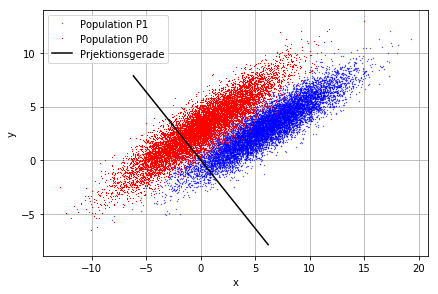

In [11]:
import matplotlib.pyplot as plt
plt.plot(data_P1["x"],data_P1["y"],"b.",label="Population P1",ms=0.6)
plt.plot(data_P0["x"],data_P0["y"],"rx",label="Population P0",ms=0.6)
plt.plot([-10*L_norm[0],10*L_norm[0]],[-10*L_norm[1],10*L_norm[1]],"k-",label="Prjektionsgerade")
plt.legend()
plt.tight_layout()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

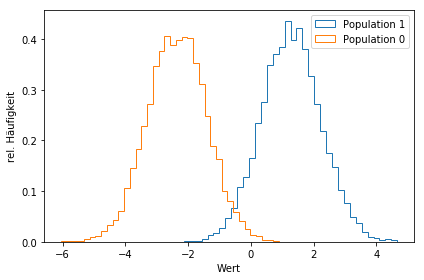

In [169]:
plt.hist(P_1_proj,bins=40,density="true",label="Population 1",histtype="step")
plt.hist(P_0_proj,bins=40,density="true",label="Population 0",histtype="step")
plt.ylabel("rel. Häufigkeit")
plt.xlabel("Wert")
plt.legend()
plt.tight_layout()
plt.show()

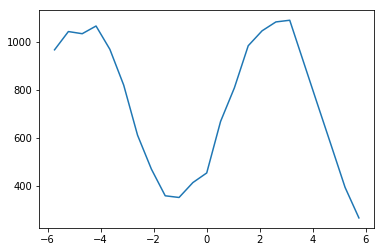

In [98]:
p1hist,p1bins=np.histogram(P_1_proj,bins=np.linspace(-3,3,24))
p0hist,p0bins=np.histogram(P_0_proj,bins=np.linspace(-3,3,24))
p01hist=p1hist+p0hist
p01bins=(p1bins[1:]+p1bins[:-1])/2+(p0bins[1:]+p0bins[:-1])/2
plt.plot(p01bins,p01hist)

In [173]:
def E_R0(L_cut):#P0 Signal
    if (len(P_0_proj[L_cut>P_0_proj])+len(P_1_proj[L_cut<P_1_proj]))==0:
        return print("cut-Paramter außerhalb des Bereiches")
    else:
        return len(P_0_proj[L_cut>P_0_proj])/len(P_0_proj),len(P_0_proj[L_cut>P_0_proj])/(len(P_0_proj[L_cut>P_0_proj])+len(P_1_proj[L_cut>P_1_proj]))
def E_R1(L_cut):#P1 Signal
    if (len(P_1_proj[L_cut<P_1_proj])+len(P_0_proj[L_cut<P_0_proj]))==0:
        return print("cut-Paramter außerhalb des Bereiches")
    else:
        return len(P_1_proj[L_cut<P_1_proj])/len(P_1_proj),len(P_1_proj[L_cut<P_1_proj])/(len(P_1_proj[L_cut<P_1_proj])+len(P_0_proj[L_cut<P_0_proj]))